In [144]:
from pyspark.sql import SparkSession

In [145]:
spark = SparkSession.builder.appName("PySpark").getOrCreate()

In [146]:
df = spark.read.csv(r'C:\Users\Dianochka\PycharmProjects\ElectionResults\data.csv', inferSchema=True, sep=';', header=True)

In [147]:
df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- uik: string (nullable = true)
 |-- region: string (nullable = true)
 |-- tik: string (nullable = true)
 |-- izbnum: integer (nullable = true)
 |-- papernum: integer (nullable = true)
 |-- paperdosr: integer (nullable = true)
 |-- paperinside: integer (nullable = true)
 |-- paperoutside: integer (nullable = true)
 |-- papergas: integer (nullable = true)
 |-- paperperen: integer (nullable = true)
 |-- paperstac: integer (nullable = true)
 |-- paperinv: integer (nullable = true)
 |-- paperval: integer (nullable = true)
 |-- paperlost: integer (nullable = true)
 |-- papernc: integer (nullable = true)
 |-- babur: integer (nullable = true)
 |-- grud: integer (nullable = true)
 |-- zhir: integer (nullable = true)
 |-- put: integer (nullable = true)
 |-- sobchak: integer (nullable = true)
 |-- surai: integer (nullable = true)
 |-- titov: integer (nullable = true)
 |-- yavl: integer (nullable = true)



In [148]:
df.createOrReplaceTempView('election')

In [149]:
table_yavka = spark.sql("""SELECT region, (sum(paperdosr)+sum(paperinside)+sum(paperoutside))/sum(izbnum)*100 as yavka FROM election GROUP BY region ORDER BY yavka DESC""")
table_yavka.show()

+--------------------+-----------------+
|              region|            yavka|
+--------------------+-----------------+
|Территория за пре...|98.06986984380843|
|     Республика Тыва|93.66369316170004|
|Ямало-Ненецкий ав...|91.90125747324196|
|Кабардино-Балкарс...|91.80157863562131|
|Чеченская Республика|91.54001705101919|
|Республика Северн...|89.98810071492768|
| Республика Дагестан|87.47795414462081|
|Карачаево-Черкесс...|87.40544668203033|
| Кемеровская область|83.22733516003962|
|Чукотский автоном...| 82.2813869592439|
|Республика Ингушетия|81.95937165135314|
|    Брянская область| 79.7078003370434|
|   Тюменская область|78.92544508025854|
|  Краснодарский край|77.86760339047925|
| Республика Мордовия|77.85708098460915|
|Республика Татарс...|77.42157684137118|
|Чувашская Республ...|76.22296238501433|
|Республика Башкор...|75.44523455707034|
|  Республика Бурятия|75.19978782127258|
|Республика Адыгея...|74.31189118555477|
+--------------------+-----------------+
only showing top

In [150]:
max_result_grud = spark.sql("""SELECT max(grud/izbnum) AS grudmax FROM election WHERE izbnum > 300""")
max_result_grud.show()
max_result_grud.createOrReplaceTempView('grudmax')

+------------------+
|           grudmax|
+------------------+
|0.5587266739846323|
+------------------+



In [151]:
max_result_grud_uik = spark.sql("""SELECT election.uik FROM election, grudmax WHERE election.grud/election.izbnum = grudmax.grudmax""")
max_result_grud_uik.show()

+--------+
|     uik|
+--------+
|УИК №149|
+--------+



In [152]:
table_yavka_tik = spark.sql("""SELECT region, tik, (sum(paperdosr)+sum(paperinside)+sum(paperoutside))/sum(izbnum)*100 as yavka FROM election GROUP BY region, tik ORDER BY yavka DESC""")
table_yavka_tik.show()
table_yavka_tik.createOrReplaceTempView('yavka_tik')

+--------------------+--------------------+-----------------+
|              region|                 tik|            yavka|
+--------------------+--------------------+-----------------+
|Архангельская обл...|         Новая Земля|  99.795605518651|
|     Республика Тыва|         Тес-Хемская|99.67462039045553|
| Сахалинская область|  Невельская судовая| 99.5766299745978|
|     Республика Тыва|   Монгун-Тайгинская|  99.545159194282|
|     Республика Тыва|        Улуг-Хемская|99.17140379612678|
|Республика Татарс...|         Тюлячинская|99.12042668662862|
|     Республика Тыва|        Сут-Хольская| 99.1156032849021|
|     Республика Тыва|           Эрзинская| 99.1008991008991|
|     Камчатский край|Петропавловск-Кам...| 99.0578734858681|
|     Республика Тыва|        Чаа-Хольская|98.94532334165973|
|     Республика Тыва|     Дзун-Хемчикская|98.83311724393407|
|Ямало-Ненецкий ав...|           Надымская|98.82072512859115|
|     Республика Тыва|       Тере-Хольская|98.80834160873883|
|Республ

In [153]:
table_region_diff_yavka = spark.sql("""SELECT region, max(yavka)-min(yavka) as yavka_difference FROM yavka_tik GROUP BY region""")
table_region_diff_yavka.show()

+--------------------+------------------+
|              region|  yavka_difference|
+--------------------+------------------+
|Республика Саха (...|  32.1800203749215|
|Калининградская о...| 35.60753377129386|
|Новосибирская обл...|17.951599646812802|
|   город Севастополь|2.5623758148774556|
|Свердловская область| 24.55172597076382|
|  Республика Хакасия|13.815237947526462|
| Магаданская область|  21.8166938545301|
|Республика Ингушетия|17.500523299444254|
|Удмуртская Респуб...|20.237823817307635|
|     Камчатский край| 35.53396843738933|
| Саратовская область| 40.03895056872615|
|Республика Башкор...|31.764062863072404|
|  Ростовская область| 35.04631174895689|
|   Калужская область|26.162234817216053|
|Еврейская автоном...| 11.67809422305374|
|Карачаево-Черкесс...|27.113728217662924|
| Республика Дагестан| 46.38987836388278|
|Ханты-Мансийский ...|26.972015730520482|
|Республика Татарс...|  39.4714905703235|
|Ямало-Ненецкий ав...|14.536170083960371|
+--------------------+------------

In [154]:
table_region_diff_yavka.select('region', 'yavka_difference').orderBy('yavka_difference', ascending=False).limit(1).show()

+--------------------+----------------+
|              region|yavka_difference|
+--------------------+----------------+
|Архангельская обл...|49.8591648406849|
+--------------------+----------------+



In [155]:
spark.sql("""SELECT region, POWER(stddev((paperdosr+paperinside+paperoutside)/izbnum), 2)*100 as dispersion FROM election GROUP BY region ORDER BY dispersion DESC""").show()


+--------------------+------------------+
|              region|        dispersion|
+--------------------+------------------+
| Сахалинская область|  4.07303893847465|
|     Камчатский край| 2.843092246127874|
|  Мурманская область| 2.800368301650886|
|     Приморский край| 2.769452541777097|
|Республика Адыгея...|2.6667296112523973|
|   Самарская область|2.4350478110406386|
| Саратовская область|2.3775104233505564|
| Республика Калмыкия|2.3562022699417047|
| Воронежская область| 2.240710057405522|
| Магаданская область| 2.067926729266737|
|Республика Татарс...| 2.002267533396386|
|    Липецкая область|1.9904628280794718|
|Архангельская обл...|1.9875912724381877|
|  Краснодарский край|1.9434098943088438|
|    Хабаровский край|1.9082383114173107|
|Белгородская область|1.8873356610906715|
| Ставропольский край|1.7961271762096436|
|  Республика Бурятия| 1.770591429360812|
|  Ростовская область|1.7255351339596567|
|Чувашская Республ...|1.6992850284127943|
+--------------------+------------

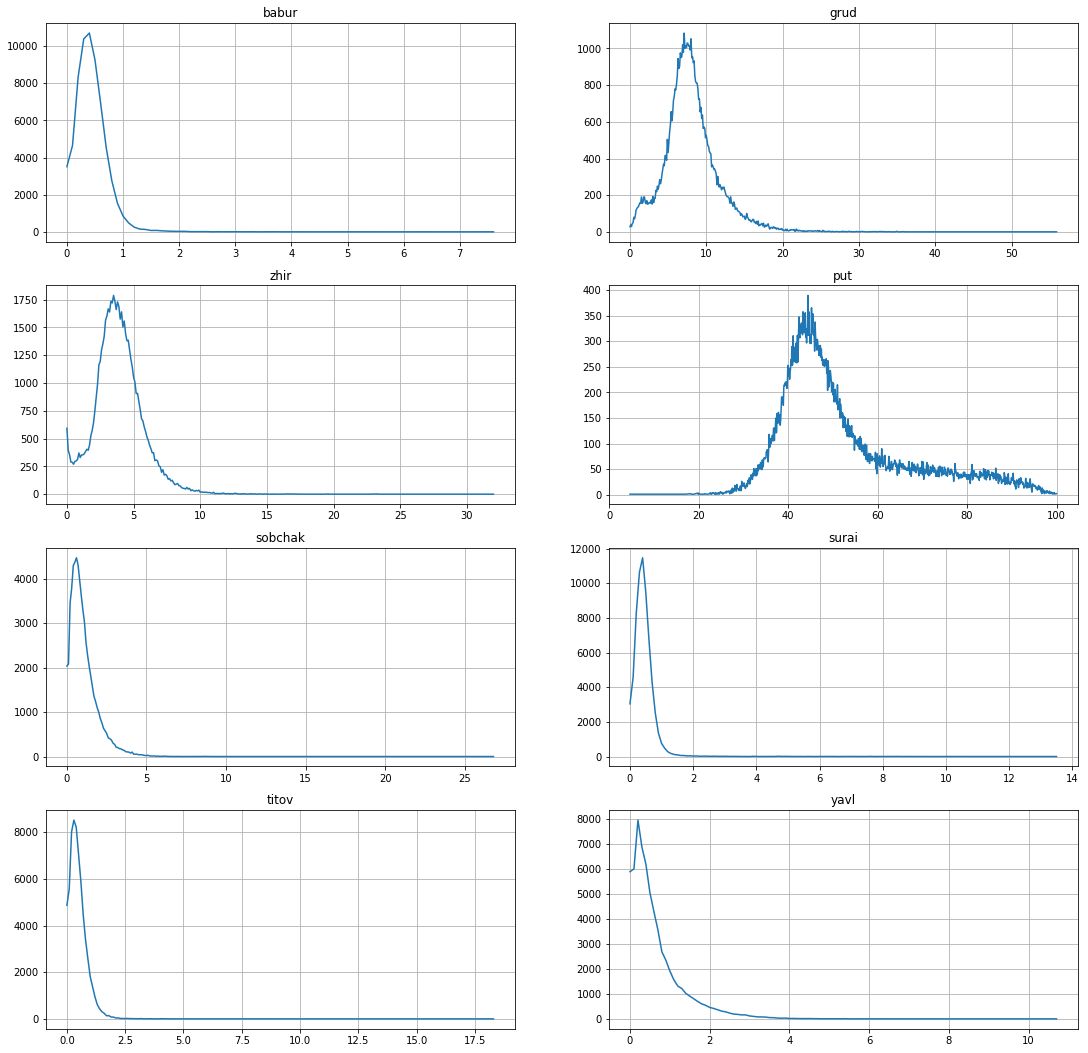

In [157]:
from matplotlib import pyplot as plt
candidates = ['babur', 'grud', 'zhir', 'put', 'sobchak', 'surai', 'titov', 'yavl']
for i in range(len(candidates)):
    res = spark.sql("""SELECT ROUND(""" + candidates[i] + """/izbnum*100, 1) as result, COUNT(uik) FROM election WHERE izbnum > 500 GROUP BY result ORDER BY result""")
    a = res.toPandas()
    a.dropna(inplace=True)
    plt.subplot(4, 2, i + 1)
    plt.title(candidates[i])
    plt.plot(a['result'], a['count(uik)'])
    plt.grid()
plt.gcf().set_size_inches(18.5, 18.5)
plt.show()
